# CBIR using Self Organising Maps

In [1]:
from skimage import color, exposure, io
import numpy as np


In [2]:
images = io.imread_collection("../image/*.jpg")
bin_count = 10


In [3]:
len(images)

1000

We use histogram (specifically gray histogram) as feature for each image. This
function is provided by `skimage` library and normalizes the features
automatically.

In [4]:
def get_histogram(image, bins_count):
    gray, _ = exposure.histogram(
        color.rgb2gray(image), normalize=True, nbins=bins_count, source_range="dtype"
    )

    return gray


In [5]:
histograms = np.array([get_histogram(image, bin_count) for image in images])


In [6]:
histograms

array([[0.        , 0.        , 0.        , ..., 0.2890625 , 0.10013835,
        0.02768962],
       [0.        , 0.        , 0.        , ..., 0.30341593, 0.10340373,
        0.02308146],
       [0.        , 0.        , 0.        , ..., 0.20243327, 0.11354574,
        0.087382  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.20765177, 0.15883382,
        0.46002197],
       [0.        , 0.        , 0.        , ..., 0.13086955, 0.1078186 ,
        0.02756755],
       [0.        , 0.        , 0.        , ..., 0.24273682, 0.24477132,
        0.05014038]])

In [7]:
from fcmeans import FCM

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
result = []

for i in range(2, 11):
    fuzzy_c_means = FCM(n_clusters=10)
    fuzzy_c_means.fit(histograms)
    result.append([i, silhouette_score(histograms, fuzzy_c_means.predict(histograms))])


In [10]:
import pandas

result_pandas = pandas.DataFrame(result, columns=["Cluster count", "Silhouette score"])


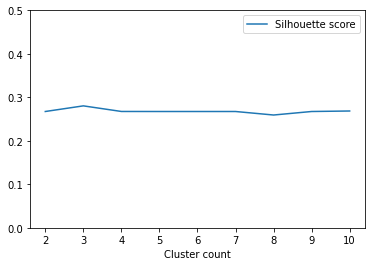

In [11]:
plot = result_pandas.plot(x="Cluster count", y="Silhouette score", ylim=(0, 0.5))
plot.get_figure().savefig("fuzzy clustering.svg")

In [13]:
result_pandas.to_excel("fuzzy clustering.xlsx")

# Finding adjusted rand score

In [20]:
fuzzy_c_means = FCM(n_clusters=10)
fuzzy_c_means.fit(histograms)


In [25]:
prediction = fuzzy_c_means.predict(histograms)

In [30]:
true_labels = np.array([i for i in range(1000)]) // 100

In [36]:
from sklearn.metrics.cluster import adjusted_rand_score

In [37]:
adjusted_rand_score(true_labels, prediction)

0.2159669594049619